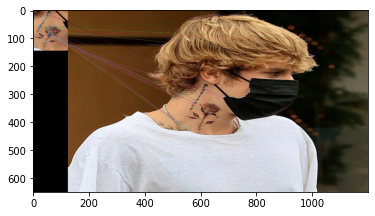

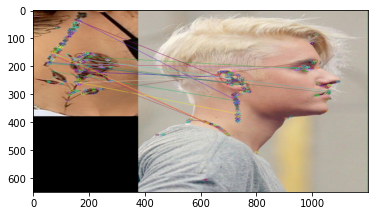

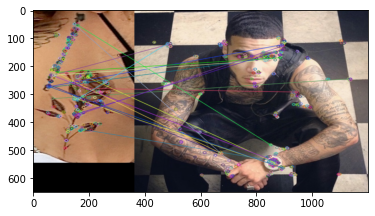

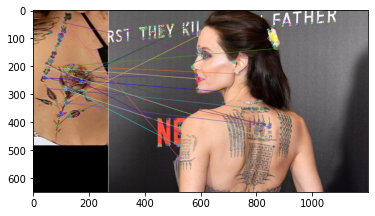

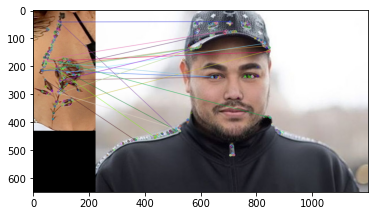

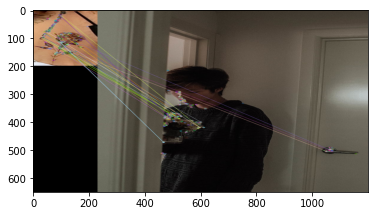

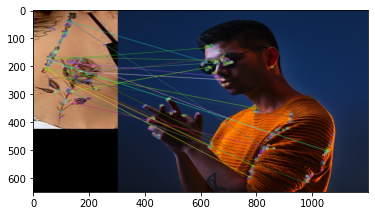

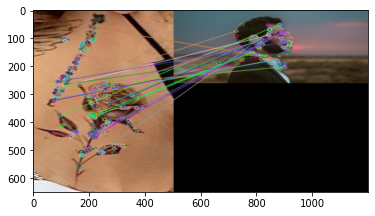

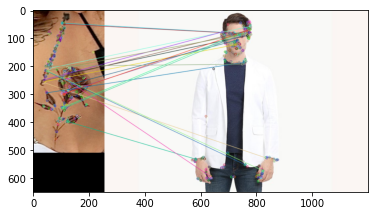

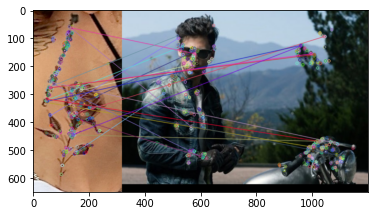

In [49]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt

#file gambar dapat dilihat di https://drive.google.com/drive/folders/1NkAWpdleJqedY6nY-aUq57yeCKLmL05U?usp=sharing
tersangka = ["Orang 1","Orang 2","Orang 3","Orang 4","Orang 5","Orang 6","Orang 7","Orang 8","Orang 9","Orang 10"]

for image, in zip(tersangka):
  # Read the training and query images
  query_img = cv2.imread('/content/Tatto.jpg')
  train_img = cv2.imread('/content/'+image+'.jpg')
  
  # Convert the images to grayscale 
  query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
  train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
  
  # Initialize the ORB detector algorithm 
  orb = cv2.ORB_create() 
  
  # Detect keypoints (features) cand calculate the descriptors
  query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
  train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
  
  # Match the keypoints
  matcher = cv2.BFMatcher() 
  matches = matcher.match(query_descriptors,train_descriptors) 
  
  # Draw the keypoint matches on the output image
  output_img = cv2.drawMatches(query_img, query_keypoints, 
  train_img, train_keypoints, matches[:20],None) 
  
  output_img = cv2.resize(output_img, (1200,650)) 
  
  # Save the final image 
  # cv2.imwrite("feature_matching_result.jpg", output_img) 

  # cv.imshow('Feature matching dengan Brute force', output_img)
  plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)),plt.show()

  # Close OpenCV upon keypress
  cv2.waitKey(0)
  cv2.destroyAllWindows()